# Vecino Más Cercano

**Elemento de estudio** 
Papas fritas:
* Pringles
* Sabritas
* Ruffles

**Razón**
Para ser sincero tenia antojo y era una escusa perfecta. Y segundo, quise variar en los ejemplos a los que propablemente mis compañeros puedieran entregar.

**Factores de clasificación:**

* Largo (cm)
* Ancho (cm)
* Area (cm2)
* Perimetro (cm)

En el caso del area se consideró la siguiente formula

In [1]:
%%HTML
<p align="center"><img src="https://www.universoformulas.com/imagenes/formulas/matematicas/geometria/calculos/ejemplo-area-elipse.jpg"></p>

Para el perimetro se considero esta otra formula:

In [2]:
%%HTML
<p align="center"><img src="https://latex.codecogs.com/gif.latex?\large&space;Perimetro&space;\approx&space;\pi&space;\left&space;[&space;3\left&space;(&space;a+b&space;\right&space;)-\sqrt{\left&space;(&space;3a+b&space;\right&space;)\left&space;(&space;a+&space;3b&space;\right&space;)}&space;\right&space;]"/></p>

In [3]:
%%HTML
<img src="imagenPapitas.jpg" style="height:50%, width:50%" />

# Código

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [17]:
df = pd.read_csv('Plantas.csv')

target = np.asarray(df['categoria'])

data = np.asarray(df.drop('categoria', axis=1))

feature_names = ['largo petalo', 'ancho petalo', 'largo hoja', 'ancho hoja']

                         #      0                        1                      2  
target_names = np.array(['Flor del Desierto',     'Corona de Cristo',        'Bélen']); 

dataset={
    'data'           : data,
    'target'         : target,
    'target_names'   : target_names,
    'feature_names'  : feature_names
}

print("Data shape: {}".format(data.shape))
print("Targets shape: {}".format(target.shape))

#print("Data shape: {}".format(data.shape))
#print("Targets shape: {}".format(data.shape))

    Largo Ptalo  Ancho Ptalo  Largo Hoja  Ancho Hoja  categoria
0           3.2          2.5        10.0         4.4          0
1           3.5          2.6         9.5         3.9          0
2           3.5          2.8         7.4         3.1          0
3           3.3          2.5         9.0         4.2          0
4           3.3          2.4         9.1         4.4          0
..          ...          ...         ...         ...        ...
85          2.5          1.8         6.2         4.9          2
86          2.5          1.6         5.6         3.9          2
87          1.6          1.0         4.5         3.2          2
88          2.6          1.0         4.3         2.5          2
89          2.0          1.4         6.0         4.0          2

[90 rows x 5 columns]
Data shape: (90, 4)
Targets shape: (90,)


Despues creamos las graficas:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (67, 4)
y_train shape: (67,)
X_test shape: (23, 4)
y_test shape: (23,)


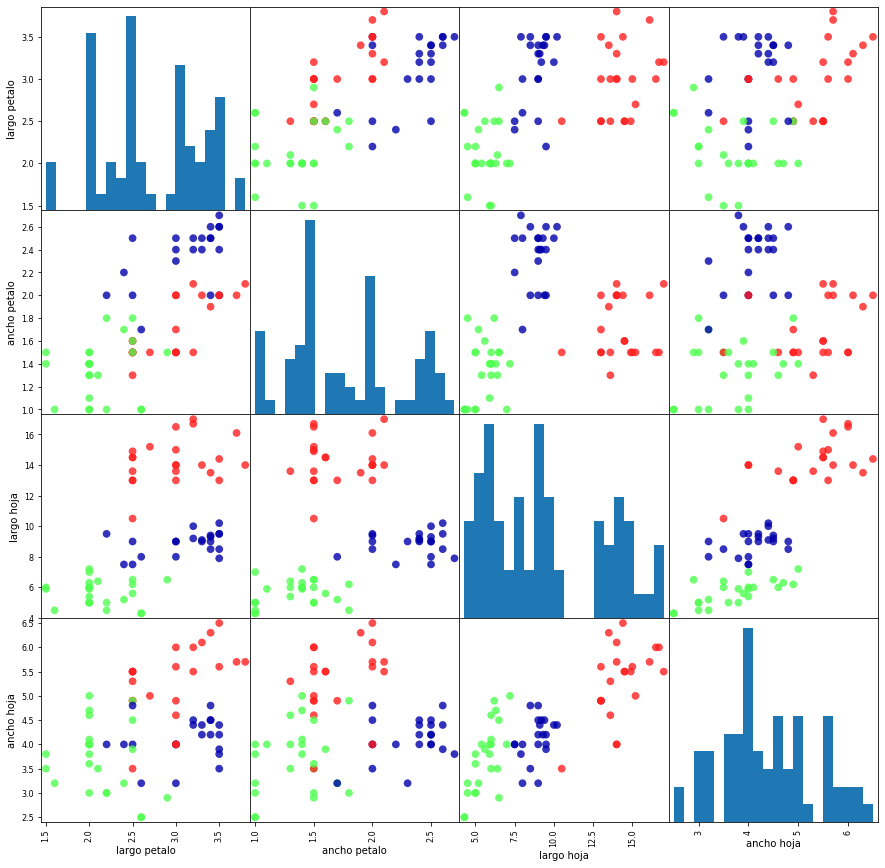

In [7]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
dataframe = pd.DataFrame(X_train, columns=dataset['feature_names'])
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(dataframe, c=y_train, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #Nota: el parametro n_neighbors indica el numero de vecinos cercanos a considerar

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
#Definimos nuestra instancia desconocida
X_new = np.array([[3,2.5,5, 4]])  
print("X_new.shape: {}".format(X_new.shape))

#Calculamos de que tipo será
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format( dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [2]
Predicted target name: ['Bélen']


In [11]:
print("Test set score: {:.2f}".format(100*knn.score(X_test, y_test)))
#plt.show();

Test set score: 95.65
